<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Exploratory Data Analysis Mini Project </h1>
     


In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
from scipy import stats
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import random

<h4 class="list-group-item list-group-item-action active" >1. DESCRIPTIVE STATISTICS</h4>

>#### 1. Create a dataframe using below data and answer the below questions:

        Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
        Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
        family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
        House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
        Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]
        
        
>##### A. Display the five point summary of the data. 
>##### B. What is the mean of the hourly expense?
>##### C. What is the median of the hourly expense?
>##### D. Find the family member with maximum income and using a suitable graph.
>##### E. Calculate IQR(the difference between 75% and 25% quartile) for `Hourly_Income` and `Hourly_Expense`.
>##### F. Calculate the standard deviation for first 2 columns.
>##### G. Calculate variance for the first 4 columns

In [480]:
Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
Family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]

dict1={'Hourly_Income':Hourly_Income,'Hourly_Expense':Hourly_Expense,
                'Family_members_count':Family_members_count,'House_rent':House_rent,
                'Highest_income_Member':Highest_income_Member}
df=pd.DataFrame(dict1)

In [481]:
# A. Display the five point summary of the data.

df.describe()

,Hourly_Income,Hourly_Expense,Family_members_count,House_rent
count,1.200000e+01,12.000000,12.000000,12.000000
mean,1.024439e+06,145412.250000,3.750000,2360.416667
std,2.274083e+06,202831.565333,1.544786,1661.663813
min,1.000000e+03,1132.000000,1.000000,0.000000
25%,3.061250e+03,3283.750000,3.000000,735.500000
50%,1.313275e+05,18485.000000,3.500000,2337.000000
75%,3.542958e+05,236985.000000,5.000000,3619.250000
max,7.567457e+06,651361.000000,6.000000,4600.000000


In [484]:
# B. What is the mean of the hourly expense?

a=df['Hourly_Expense'].mean()

print('Mean of the hourly expense is: ',a)

Mean of the hourly expense is:  145412.25


In [485]:
# C. What is the median of the hourly expense?

a=df['Hourly_Expense'].median()

print('Median of the hourly expense is: ',a)

Median of the hourly expense is:  18485.0


From the below bar graph it can be ssen that Jacobi has the highest income.


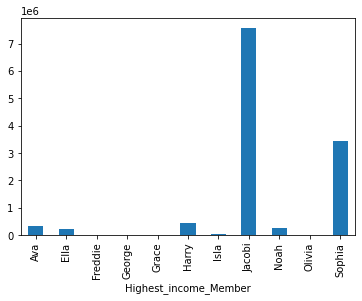

In [486]:
# D. Find the family member with maximum income and using a suitable graph

df.groupby('Highest_income_Member')['Hourly_Income'].max()
df.groupby('Highest_income_Member')['Hourly_Income'].max().plot(kind='bar');

print('From the below bar graph it can be ssen that Jacobi has the highest income.')

In [487]:
# E. Calculate IQR(the difference between 75% and 25% quartile) for Hourly_Income and Hourly_Expense.

a=df['Hourly_Income'].quantile(0.75)-df['Hourly_Income'].quantile(0.25)
print('IQR for Hourly_Income: ',a)
b=df['Hourly_Expense'].quantile(0.75)-df['Hourly_Expense'].quantile(0.25)
print('IQR for Hourly_Expense: ',b)

IQR for Hourly_Income:  351234.5
IQR for Hourly_Expense:  233701.25


In [500]:
# F. Calculate the standard deviation for first 2 columns.

print('SD for Hourly_Income: ',df['Hourly_Income'].std())
print('SD for Hourly_Expense: ',df['Hourly_Expense'].std())

SD for Hourly_Income:  2274082.7497064094
SD for Hourly_Expense:  202831.56533265588


In [501]:
# G. Calculate variance for the first 4 columns

print('SD for Hourly_Income: ',df['Hourly_Income'].var())
print('SD for Hourly_Expense: ',df['Hourly_Expense'].var())
print('SD for Family_members_count: ',df['Family_members_count'].var())
print('SD for House_rent: ',df['House_rent'].var())

SD for Hourly_Income:  5171452352512.265
SD for Hourly_Expense:  41140643895.295456
SD for Family_members_count:  2.3863636363636362
SD for House_rent:  2761126.6287878784


In [496]:
df.head()

,Hourly_Income,Hourly_Expense,Family_members_count,House_rent,Highest_income_Member
0,1000,651361,3,1299,Olivia
1,2009,217371,4,2300,George
2,24418,2746,2,3411,Isla
3,444478,2356,3,3422,Harry
4,324235,13436,1,4566,Ava


<h4 class="list-group-item list-group-item-action active" >2. Preliminary Wrangling,</h4>

>### Dataset Information: 

Dataset recording people to invest in each other in a way that is financially and socially rewarding. On loans, borrowers list loan requests between $ 2,000 and $ 35,000 and individual investors invest as little as $ 25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.




>#### A. Read the dataset called Pri-Load.csv
>#### B.  Check the data type and adjust datatype for all other categorical columns.
>#### C. If you find any of the missing values in the ProsperRating column, then drop it.



In [507]:
# A. Read the dataset called Pri-Load.csv

df=pd.read_csv('Pri-Load.csv')
df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


In [508]:
# B. Check the data type and adjust datatype for all other categorical columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingCreationDate        1035 non-null   object 
 1   Term                       1035 non-null   int64  
 2   LoanStatus                 1035 non-null   object 
 3   ClosedDate                 479 non-null    object 
 4   BorrowerAPR                1035 non-null   float64
 5   BorrowerRate               1035 non-null   float64
 6   LenderYield                1035 non-null   float64
 7   ProsperRating (Alpha)      783 non-null    object 
 8   ProsperScore               783 non-null    float64
 9   ListingCategory (numeric)  1035 non-null   int64  
 10  BorrowerState              983 non-null    object 
 11  Occupation                 996 non-null    object 
 12  EmploymentStatus           1010 non-null   object 
 13  AmountDelinquent           954 non-null    float

In [509]:
# C. If you find any of the missing values in the ProsperRating column, then drop it.

df['ProsperRating (Alpha)'].isnull().sum()

df_updated = df.drop(['ProsperRating (Alpha)'],axis=1)

df_updated.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),BorrowerState,...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,0,CO,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,7.0,2,CO,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,0,GA,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,9.0,16,GA,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,4.0,2,MN,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


<h4 class="list-group-item list-group-item-action active" >3. UNIVARIATE ANALYSIS</h4>

>#### A. What are the main features of interest in your dataset?

    Step1: Apply Univariate analysis using suitable charts for[ Loan status, Employment Status, Stated Monthly Income]

    Step2: Check if any column distribution skew or not.

    Step3: Write at least 2 observations for each visualization.




AxesSubplot(0.125,0.125;0.775x0.755)


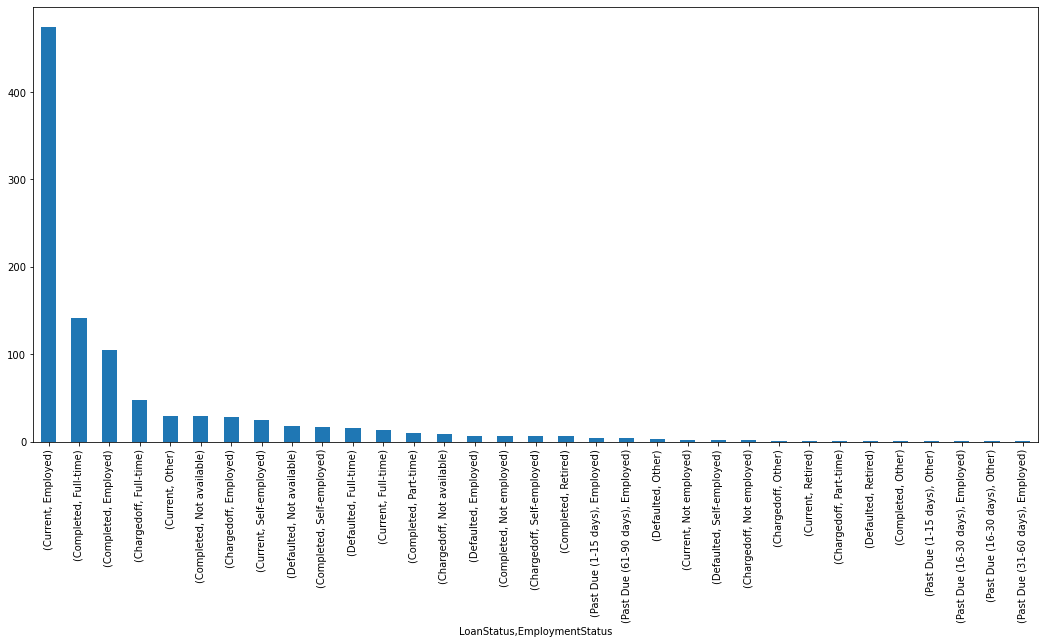

In [510]:
# A. What are the main features of interest in your dataset?

# Step1: Apply Univariate analysis using suitable charts for[ Loan status, Employment Status, Stated Monthly Income]

plt.figure(figsize=(18,8))
print(df[['LoanStatus','EmploymentStatus']].value_counts().plot(kind='bar'));

AxesSubplot(0.125,0.125;0.775x0.755)


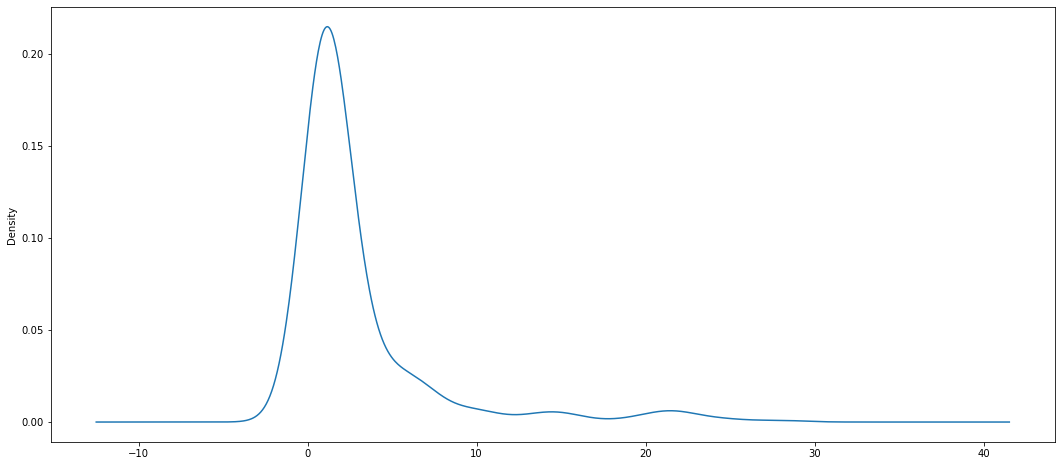

In [513]:
plt.figure(figsize=(18,8))
print(df['StatedMonthlyIncome'].value_counts().plot(kind='kde'));

Term                          1.044179
BorrowerAPR                   0.267334
BorrowerRate                  0.314124
LenderYield                   0.331794
ProsperScore                  0.149154
ListingCategory (numeric)     2.277709
AmountDelinquent             15.554333
StatedMonthlyIncome           3.225084
LoanCurrentDaysDelinquent     3.694044
LoanOriginalAmount            1.180358
MonthlyLoanPayment            1.247707
LP_InterestandFees            2.345340
Investors                     2.303866
dtype: float64
AmountDelinquent column is heavily right skewed


<AxesSubplot:xlabel='AmountDelinquent', ylabel='Density'>

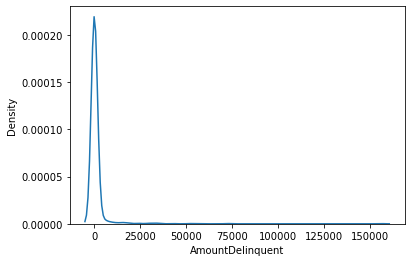

In [163]:
# Step2: Check if any column distribution skew or not.

print(df.skew())
print('AmountDelinquent column is heavily right skewed')
sns.kdeplot(df['AmountDelinquent'])

In [515]:
# Step3: Write at least 2 observations for each visualization.

print('From the StatedMonthlyIncome column it can be clearly seen that the graph is Right Skewed, i.e we have more number of outliers in the right hand side of the curve')

From the StatedMonthlyIncome column it can be clearly seen that the graph is Right Skewed, i.e we have more number of outliers in the right hand side of the curve


In [152]:
df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


<h4 class="list-group-item list-group-item-action active" >4. BIVARIATE ANALYSIS</h4>

>#### A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.
>#### B. Check the relation between `LoanOriginalAmount` and `BorrowerAPR` columns. 

    Step1: Use subplots. 
    
        Plot1: Scatter Plot of LoanOriginalAmount and BorrowerAPR columns    

        Plot2: HeatMap of LoanOriginalAmount and BorrowerAPR
        
    Step2: Write your observations.         
        
>#### C.Display the seperate box plot for `y = BorrowerAPR`  with x1 = `LoanStatus`, x2 = `EmploymentStatus` columns.Write your observations. 


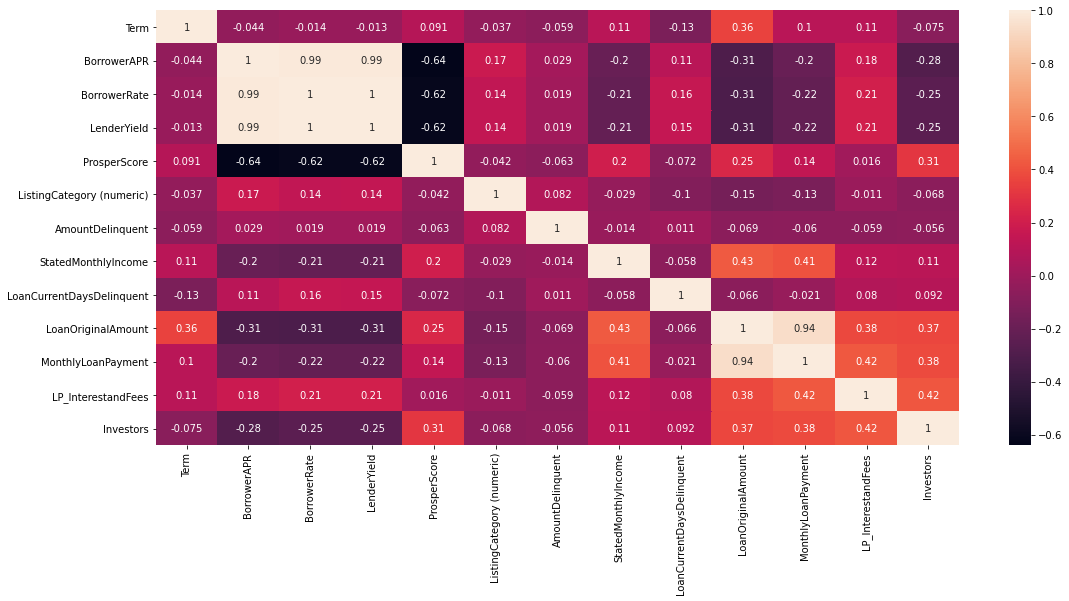

In [166]:
# A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True);

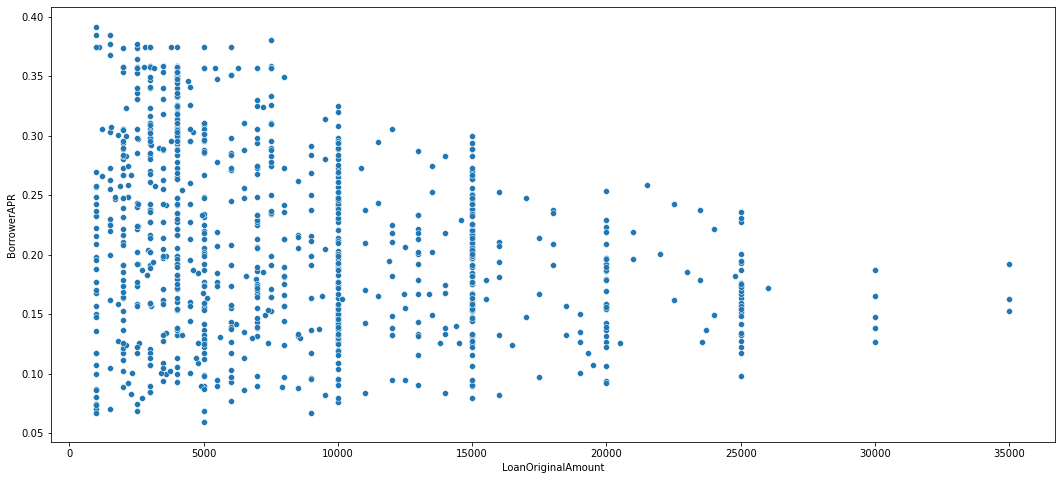

In [182]:
# B. Check the relation between LoanOriginalAmount and BorrowerAPR columns.
# Step1: Use subplots. 
# Plot1: Scatter Plot of LoanOriginalAmount and BorrowerAPR columns

plt.figure(figsize=(18,8))
sns.scatterplot(df['LoanOriginalAmount'],df['BorrowerAPR']);

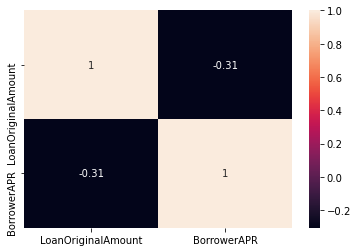

In [183]:
# B. Check the relation between LoanOriginalAmount and BorrowerAPR columns.
# Step1: Use subplots. 
# Plot2: HeatMap of LoanOriginalAmount and BorrowerAPR

sns.heatmap(df[['LoanOriginalAmount','BorrowerAPR']].corr(),annot=True);

In [187]:
# B. Check the relation between LoanOriginalAmount and BorrowerAPR columns.
# Step2: Write your observations. 

print('From the Heat Map plot it can be seen that LoanOriginalAmount and BorrowerAPR have a negative correlation i.e if one value increases then the other decreases and vice versa')

From the Heat Map plot it can be seen that LoanOriginalAmount and BorrowerAPR have a negative correlation i.e if one value increases then the other decreases and vice versa


There are some ouliers present in Past Due (60-90 Days) column 
 Loan Status for Past Due (16-30 Days) has the highest Borrower APR


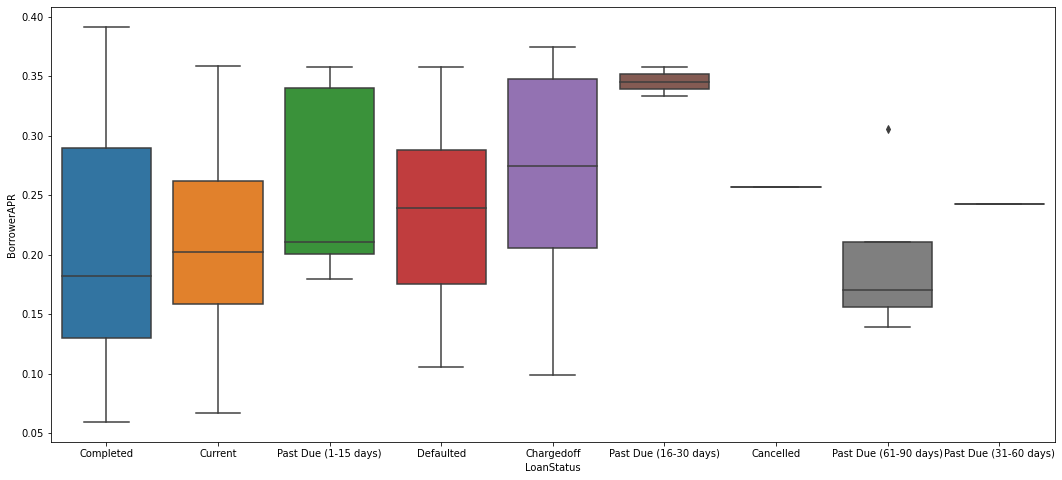

In [203]:
# C.Display the seperate box plot for y = BorrowerAPR with x1 = LoanStatus, x2 = EmploymentStatus columns.
# Write your observations.

plt.figure(figsize=(18,8))
sns.boxplot(data=df,x='LoanStatus',y='BorrowerAPR');
print('There are some ouliers present in Past Due (60-90 Days) column','\n','Loan Status for Past Due (16-30 Days) has the highest Borrower APR')

There are some ouliers present in Not Employed and Part Time column 
 Not Employed has the most amount of Borrower APR


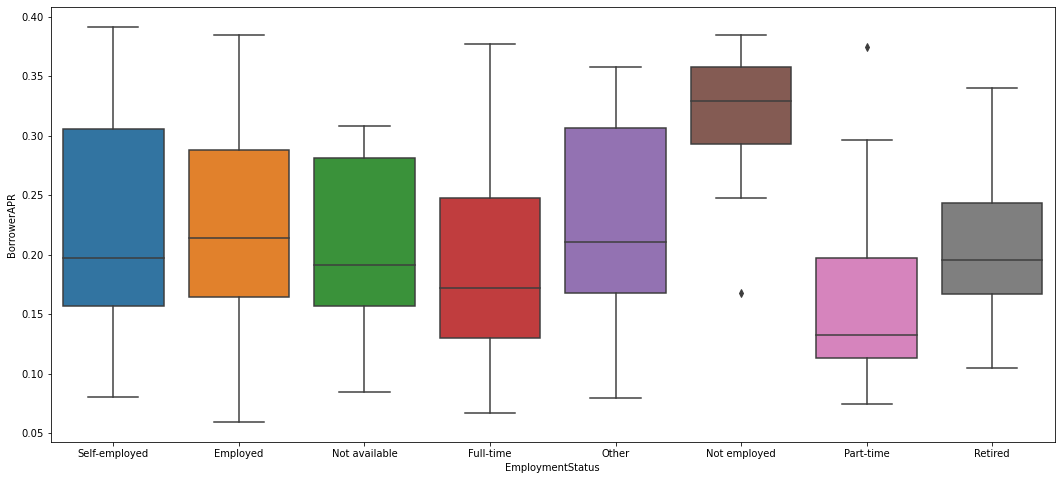

In [431]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df,x='EmploymentStatus',y='BorrowerAPR');
print('There are some ouliers present in Not Employed and Part Time column','\n','Not Employed has the most amount of Borrower APR')

In [462]:
df[['LoanOriginalAmount','BorrowerAPR']]

df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)'], dtype=object)

<h4 class="list-group-item list-group-item-action active" >5.  MULTI VARIATE ANALYSIS, FEATURE ENGINEERING</h4>

>#### A. Write a program

    Step 1: Create a  condition = 'LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |\'LoanStatus' == 'Chargedoff'

    Step2: Create a user define function  using condition and `LoanStatus` column.

    Hint: df['LoanStatus'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Completed    168
        
        Defaulted     59


>#### B. Write a program

    Step 1: Create a  dictionary called categories = 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'

    Step2: Create a user define function  using categories and `ListingCategory (numeric)` column.

    Hint: df['ListingCategory (numeric)'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Debt Consolidation    106

        Other                  65

        Business               25

        Home Improvement       22

        Auto                    9

>#### C. Display the box plot for `ProsperRating (Alpha)` vs `LoanOriginalAmount` and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

>#### D. Display the catplot for `ProsperRating (Alpha)` vs `ListingCategory (numeric)`[Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

In [427]:
# A. Write a program
# Step 1: Create a  condition = 'LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |\'LoanStatus' == 'Chargedoff'
# Hint: df['LoanStatus'] = df.apply(user define function , axis=1)

df['Condition']='LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |'LoanStatus' == 'Chargedoff'

In [476]:
df.head(50)
# (df['LoanStatus']=='Chargedoff').value_counts()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,Other,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.1400,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,Home Improvement,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.0000,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,Other,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.6300,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,Other,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.1100,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,Home Improvement,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.6300,20
5,2013-12-14 08:26:37.093000000,60,Current,NaN,0.15425,0.1314,0.1214,B,10.0,Debt Consolidation,...,Employed,0.0,8333.333333,0,15000,24-12-2013 0.00,Q4 2013,342.37,327.4500,1
6,2013-04-12 09:52:56.147000000,36,Current,NaN,0.31032,0.2712,0.2612,E,2.0,Debt Consolidation,...,Employed,0.0,2083.333333,0,3000,18-04-2013 0.00,Q2 2013,122.67,622.4500,1
7,2013-05-05 06:49:27.493000000,36,Current,NaN,0.23939,0.2019,0.1919,C,4.0,Home Improvement,...,Employed,0.0,3355.750000,0,10000,13-05-2013 0.00,Q2 2013,372.60,1397.5100,1
8,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,AA,9.0,Other,...,Employed,0.0,3333.333333,0,10000,12-12-2013 0.00,Q4 2013,305.54,105.5000,1
9,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,AA,11.0,Other,...,Employed,0.0,3333.333333,0,10000,12-12-2013 0.00,Q4 2013,305.54,105.5000,1


In [ ]:
# A. Write a program
# Step2: Create a user define function  using condition and `LoanStatus` column.

df['LoanStatus'] = df.apply(loan_stat , axis=1)

In [435]:
# B. Write a program
# Step 1: Create a  dictionary called categories = 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 
# 6: 'Auto', 7: 'Other'

Categories={1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
Categories

{1: 'Debt Consolidation',
 2: 'Home Improvement',
 3: 'Business',
 6: 'Auto',
 7: 'Other'}

In [463]:
# B. Write a program
# Step2: Create a user define function  using categories and `ListingCategory (numeric)` column.
# Hint: df['ListingCategory (numeric)'] = df.apply(user define function , axis=1)

def list_cat(Cat):
        if Cat==1:
            return 'Debt Consolidation'
        elif Cat==2:
            return'Home Improvement'
        elif Cat==3:
            return'Business'
        elif Cat==6:
            return'Auto'
        else:
            return'Other'
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].apply(list_cat)

array([525, 359,  74,  54,  23], dtype=int64)

In [474]:
df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    525
Other                 359
Home Improvement       74
Business               54
Auto                   23
Name: ListingCategory (numeric), dtype: int64

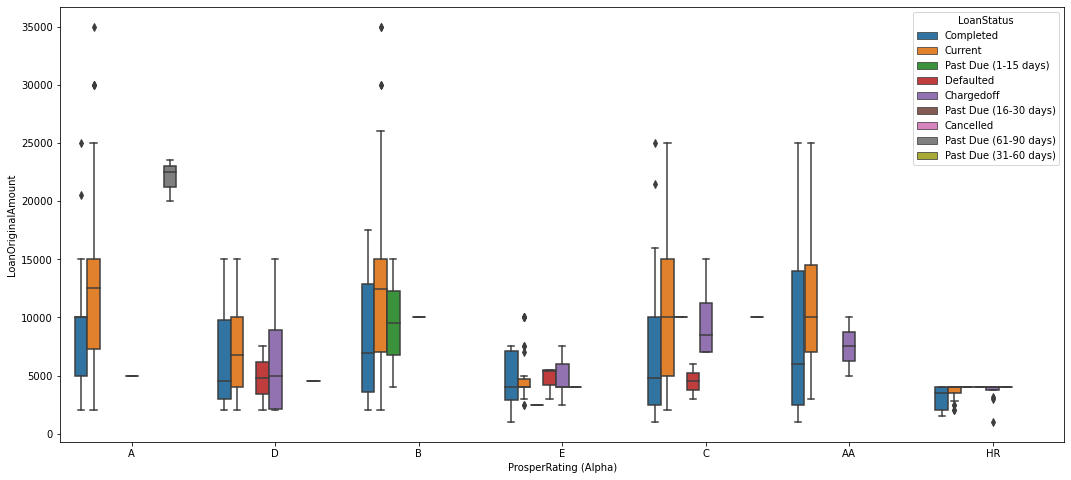

In [399]:
# C. Display the box plot for ProsperRating (Alpha) vs LoanOriginalAmount and hue = Loan Status[Completed,Defaulted]. 
# Write your observations.

plt.figure(figsize=(18,8))
sns.boxplot(data=df,x='ProsperRating (Alpha)',y='LoanOriginalAmount',hue='LoanStatus');

'A' i.e. ProsperRating (Alpha) have most number of Current Loan Status


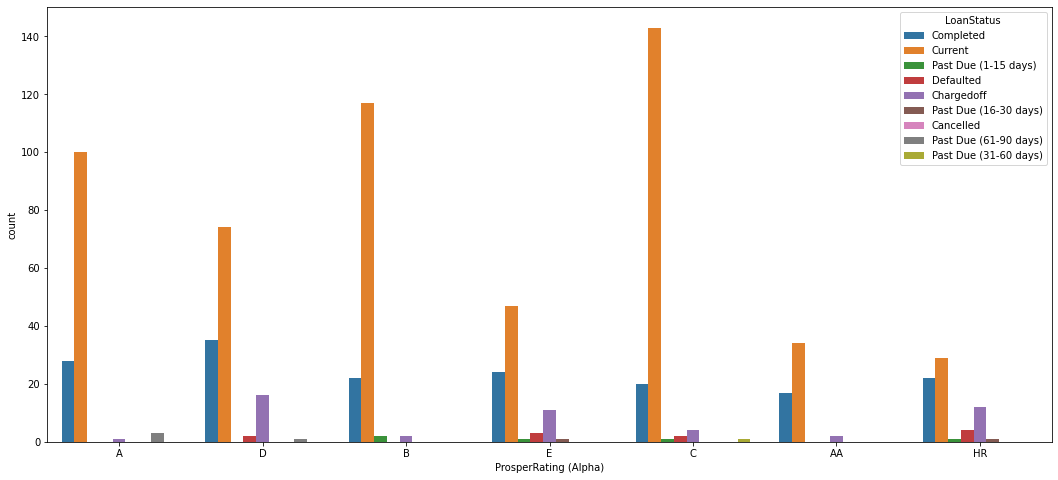

In [426]:
# D. Display the catplot for ProsperRating (Alpha) vs ListingCategory (numeric)
# [Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = Loan Status[Completed,Defaulted]. 
# Write your observations.

plt.figure(figsize=(18,8))
sns.countplot(data=df,x='ProsperRating (Alpha)',hue='LoanStatus');
print("'A' i.e. ProsperRating (Alpha) have most number of Current Loan Status")

Debt Consolidation have most number of Current Loan Status


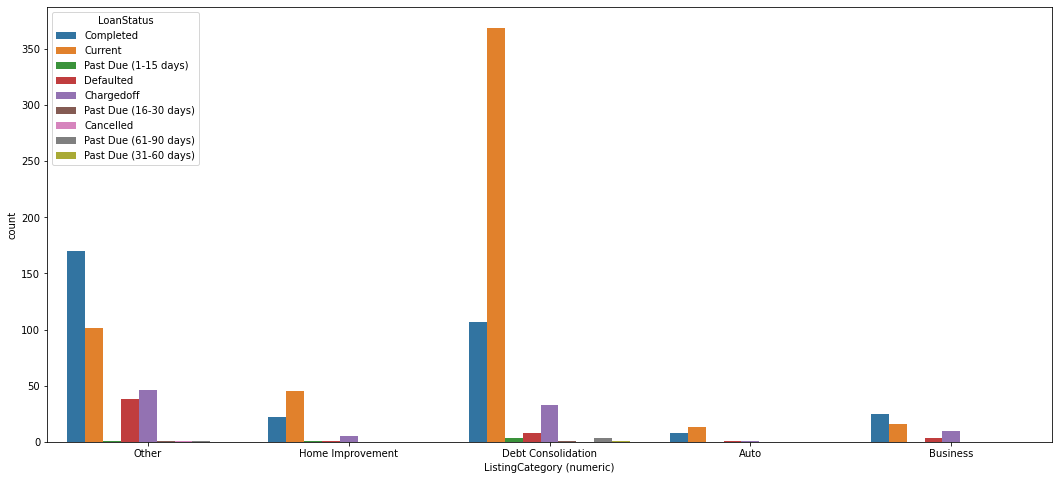

In [425]:
plt.figure(figsize=(18,8))
sns.countplot(data=df,x='ListingCategory (numeric)',hue='LoanStatus');
print("Debt Consolidation have most number of Current Loan Status")